2017019740001_kwakjuheon
2017019740002_kimjiho
2017019740003_songyejin
2017019740004_parksohui
2017019740005_moonyeonwoo
2017019740006_kangsubin
2017019740007_leekyeongeun
2017019740008_chochaeyeon
2017019740009_shindonghwan
2017019740010_kwakmirae


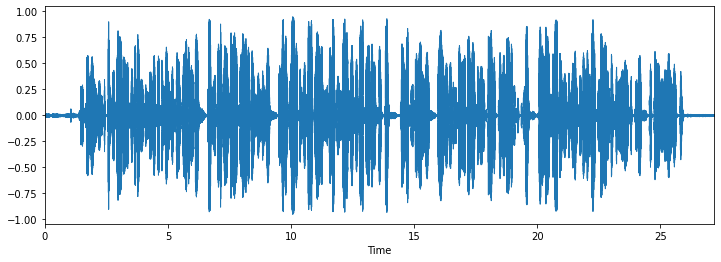

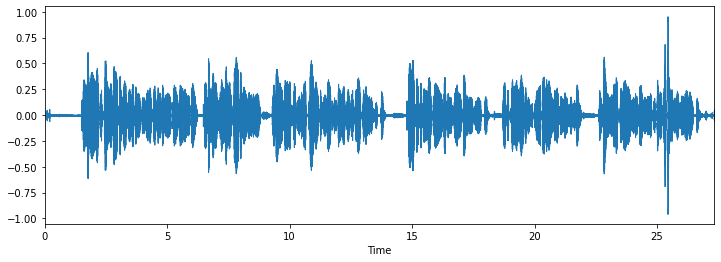

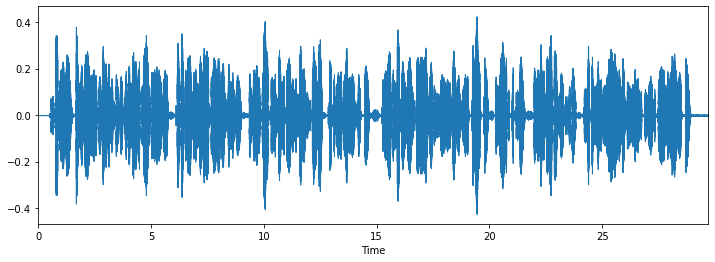

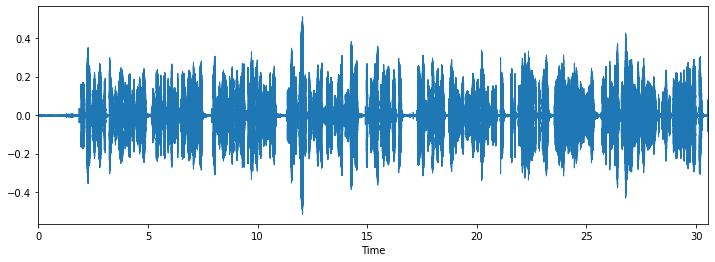

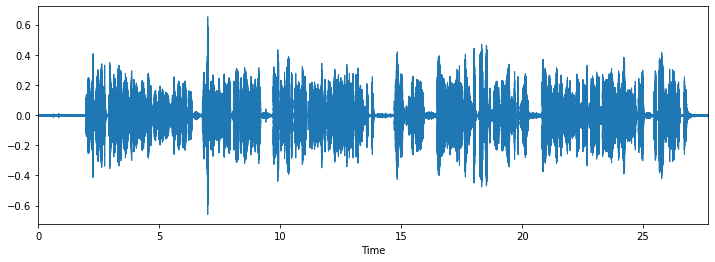

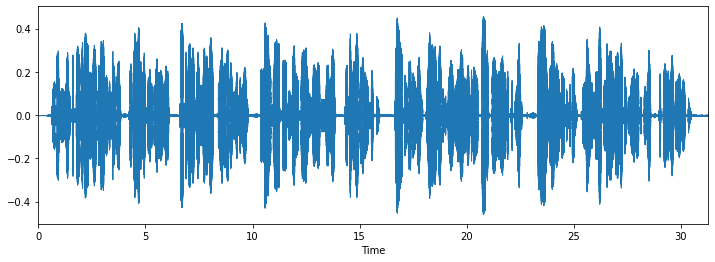

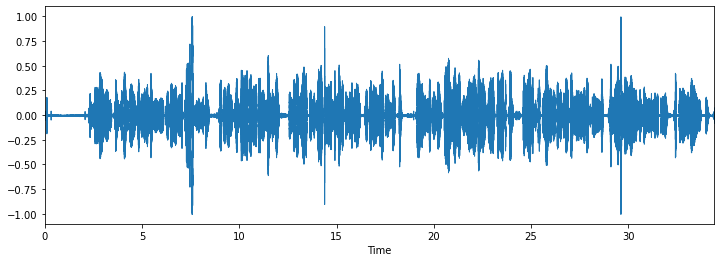

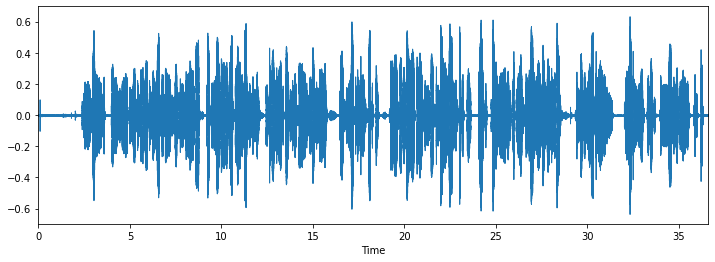

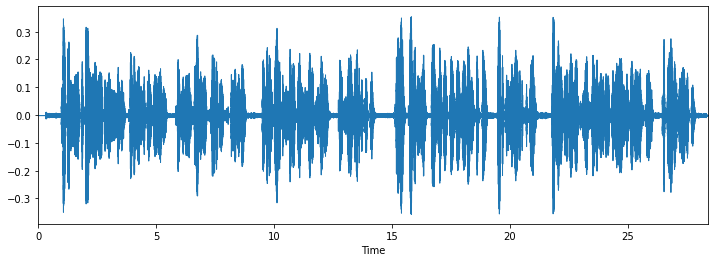

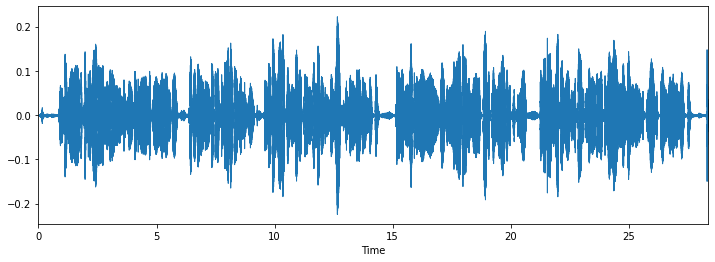

In [33]:
import os
import pandas as pd
import librosa.display
import glob 
import matplotlib.pyplot as plt
import numpy as np

list_dir = os.listdir('./test_train_data')
list_dir.sort()
for i in list_dir[:10]:
    data, sampling_rate = librosa.load('./test_train_data/'+ i + '/1.wav')
    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(data, sr=sampling_rate)
    print(i)

2017019740007_leekyeongeun
./test_train_data/2017019740007_leekyeongeun/2.wav
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0253204e-05 3.2462573e-05
 0.0000000e+00]
22050


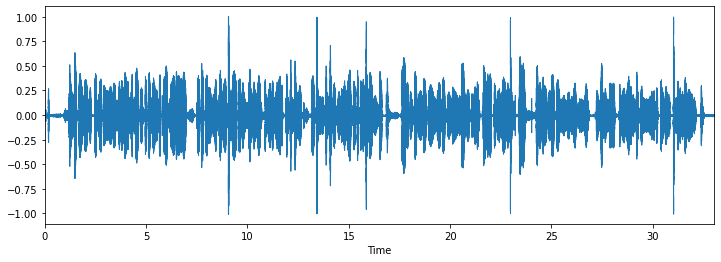

In [34]:
import random

data_dir = './test_train_data/'
i_1 = random.choice(list_dir)
index = list_dir.index(i_1)
audio_name = list_dir[index]
print(audio_name)
dir1 = data_dir + audio_name
num = os.listdir(dir1)
i = random.choice(num)
path = os.path.join(data_dir, audio_name, str(i))
print(path)
x, sr = librosa.load(path)
print(x)
print(sr)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [35]:
print(len(list_dir))

118


In [36]:
ind = pd.Index(list_dir)
ind.value_counts()

2017019770035_leehyojin       1
2017019770019_leewooju        1
2017019740013_kwakyiheon      1
2017019740009_shindonghwan    1
2017019740032_choiyeongmi     1
                             ..
2017019880038_baejaehong      1
2017019880020_yoonhyeeun      1
2017019770003_johaesu         1
2017019770029_jueunhong       1
2017019740034_kimdongwook     1
Length: 118, dtype: int64

In [40]:
test = pd.read_csv('./test.csv')
test['Class'] = '2017019740001_kwakjuheon'
test.to_csv('sub01.csv', index=False)

FileNotFoundError: [Errno 2] File ../data/test.csv does not exist: '../data/test.csv'

In [41]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(data_dir), audio_name, str(row))

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file)
      return None, None
 
   feature = mfccs
   label = row.Class
 
   return [feature, label]

a, b = parser(i)
print(a, b)
df = pd.Series(list_dir)
temp = df.apply(parser, axis=1)
temp.columns = ['feature', 'label']

AttributeError: 'str' object has no attribute 'Class'

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(X, y, batch_size=32, epochs=5, validation_data=(val_x, val_y))